# OpenCV 
- Open Source Computer Vision Library
- image_net: http://image-net.org/
- pip install opencv-python
- https://opencv.org/


# TensorFlow
- AI 神器
- 计算图 + 张量
- pip install tensorflow
- https://www.tensorflow.org/


In [1]:
import cv2
import tensorflow as tf


In [1]:
# 引入 OpenCV
import cv2

# 调用 API 读取图片
# 参数1 图片文件路径；参数2 读取格式，0代表灰度，1代表彩色
img = cv2.imread("./image/image0.jpg", 1)

# 调用 API 展示图片
# 参数1 展示窗体名称；参数2 需要展示的图片
cv2.imshow("image", img)

# 需要一个等待，窗体才能正常显示，否则就是报错
cv2.waitKey(0)

-1

直接关闭窗体，表示程序异常退出，返回值为 -1

imread 方法完成了 1 文件的读取，2 封装格式解析，3 数据解码，4 数据加载

jpg 格式，png 格式  ：文件头，文件数据；压缩编码（文件头描述压缩格式等等信息）

In [3]:
# 调用 API 写入图像
# 参数1 写入图像的名称以及路径（自动保存）；参数2 需要写入的图像数据
cv2.imwrite("./image/image1.jpg", img)

True

True 代表图像写入成功，返回值为 bool 类型

In [5]:
# 图像质量
cv2.imwrite("./image/imageTest.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, 50])

True

jpg   IMWRITE_JPEG_QUALITY 当前图像的质量，0——100，有损压缩，0代表压缩比高，

png   IMWRITE_PNG_COMPRESSION  当前图像质量，0——9 无损压缩，0代表压缩比低

In [6]:
# 图像质量
cv2.imwrite("./image/imageTest.png", img, [cv2.IMWRITE_PNG_COMPRESSION, 0])

True

## 图像像素操作
- 像素
- RGB 分量
- 颜色深度（0-255）8bit 颜色深度
- 宽 高 / W H 640*480 代表着水平像素点 640，垂直像素点 480
- 1.14 M = 720 * 547 * 3 * 8bit = 720 * 547 * 3 B = 1.14 M
- RGB alpha(图像透明度信息)，颜色通道和透明度通道
- BGR bgr 颜色顺序分量 （OpenCV 就是这样的颜色顺序）
- 图像储存的坐标结构，左上角为坐标原点

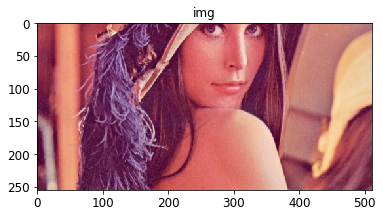

In [27]:
# 实现在 notebook 中显示图像结果，而不是重新打开一个窗口
def imshow_notebook(name, img):
    import matplotlib.pyplot as plt
    %matplotlib inline
    # To plot pretty figures
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    
    # OpenCV 颜色通道顺序 BGR
    # Matplotlib 颜色通道顺序 RGB
    img = img[:, :, (2, 1, 0)]
    plt.imshow(img)
    plt.title(name)
    plt.show()

# test the function imshow_notebook
import cv2
img = cv2.imread("./image/image0.jpg", 1)
imshow_notebook("img",img)
# cv2.imshow("img", img)
# cv2.waitKey(0)

In [17]:
# 读取像素点
(b, g, r) = img[100, 100]
print(b, g, r)

70 23 91


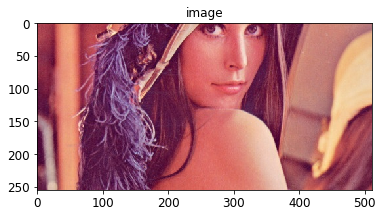

In [28]:
# 操作图像像素，绘制一条红色竖线
# 像素坐标：10 100 - 100 100
for i in range(1, 100):
    img[10 + i, 100] = (0, 0, 255)
    
imshow_notebook("image", img)
# cv2.imshow("img", img)
# cv2.waitKey(0)

# 图像的几何变换
- 图像缩放
- 图像剪切
- 图像位移
- 图像镜像
- 图像仿射变换：位移 旋转 缩放


In [19]:
# 图像缩放
# OpenCV API 
# step 1 load, 2 info, 3 resize, 4 check
import cv2

img = cv2.imread("./image/image0.jpg", 1)
imgInfo = img.shape
imgInfo

(255, 511, 3)

In [20]:
# help() 函数可以打印输出一个函数的文档字符串
# type() 函数是用于求一个未知数据类型对象，type 主要用于判断未知数据类型
# dir() 函数可以找到模块内定义的所有名称。以一个字符串列表的形式返回
print(type(img))
print(type(imgInfo))
dir(img)

<class 'numpy.ndarray'>
<class 'tuple'>


['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

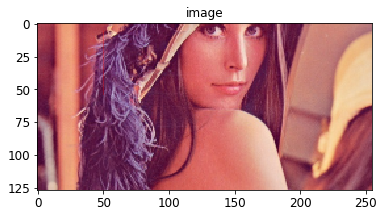

In [29]:
# 高 宽 通道数
height = imgInfo[0]
width = imgInfo[1]
mode = imgInfo[2]

# 等比例缩放 放大或者缩小
dst_height = int (height *0.5)
dst_width = int (width *0.5)

# 最近邻域插值、双线性插值（默认）、像素关系重采样、立方插值
dst = cv2.resize(img, (dst_width, dst_height))
imshow_notebook("image", dst)
# cv2.imshow("img", img)
# cv2.waitKey(0)

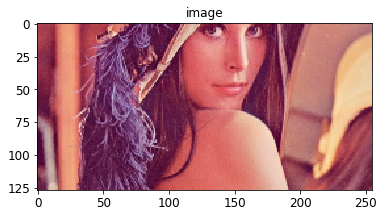

In [30]:
# 最近邻域插值、双线性插值 原理
# 源码实现最近邻域插值
import cv2
import numpy as np

img = cv2.imread("./image/image0.jpg", 1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
channels = imgInfo[2]

dst_heigth = int(height/2)
dst_width = int(width/2)
dst_mode = channels

# 颜色深度为 8bit(0-255)
dst_img = np.zeros((dst_heigth, dst_width, channels), np.uint8)

for i in range(0, dst_height): # row
    for j in range(0, dst_width): # column
        i_new = int(i * (height*1.0 / dst_height))
        j_new = int(j * (width*1.0 / dst_width))
        dst_img[i, j] = img[i_new, j_new]

imshow_notebook("image", dst_img)
# cv2.imshow("img", img)
# cv2.waitKey(0)

1. OpenCV API 调用
2. 算法原理（数学理论）
3. 算法源码浏览查看
4. 算法源码自定义实现

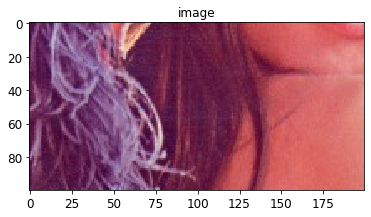

In [31]:
# 图像剪切
# 坐标信息（矩阵形式）
# X 从 100 到 200
# Y 从 100 到 300

# import cv2
# img = cv2.imread("./image/image0.jpg", 1)
# imgInfo = img.shape
dst = img[100:200, 100:300]
imshow_notebook("image", dst)
# cv2.imshow("img", img)
# cv2.waitKey(0)

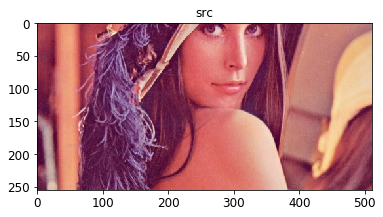

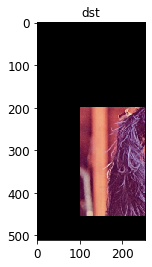

In [32]:
# 图像移位
# import cv2
# img = cv2.imread("./image/image0.jpg", 1)
# cv2.imshow("src", img)
imshow_notebook("src", img)

# imgInfo = img.shape
# height = imgInfo[0]
# width = imgInfo[1]

# 移位矩阵
mat_shift = np.float32([[1, 0, 100], [0, 1, 200]]) # 2*3

# 矩阵运算； 参数1 图像数据；参数2 移位矩阵；参数3 原始图像信息 
dst = cv2.warpAffine(img, mat_shift, (height, width))

imshow_notebook("dst", dst)
# cv2.imshow("dst", dst)
# cv2.waitKey(0)

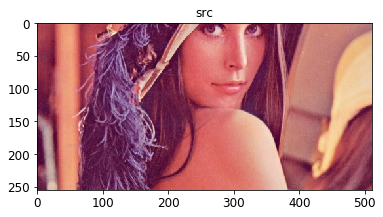

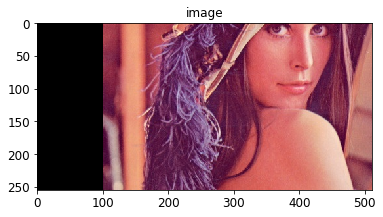

In [33]:
# 移位算法原理
# 源码实现移位

import cv2
import numpy as np

img = cv2.imread("./image/image0.jpg", 1)
# cv2.imshow("src", img)
imshow_notebook("src", img)

imgInfo = img.shape

dst = np.zeros(img.shape, np.uint8)
height = imgInfo[0]
width = imgInfo[1]

for i in range(0, height):
    for j in range(0, width-100):
        dst[i, j+100] = img[i, j]
    
# cv2.imshow("image", dst)
# cv2.waitKey(0)
imshow_notebook("image", dst)

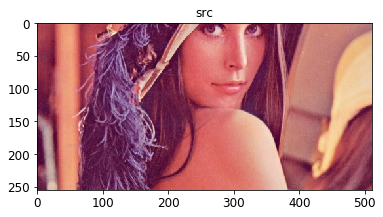

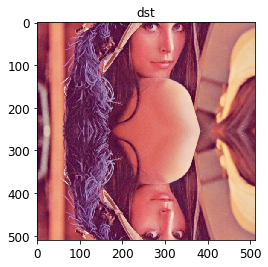

In [35]:
# 图像镜像
import cv2
import numpy as np

img = cv2.imread("./image/image0.jpg", 1)
# cv2.imshow("src", img)
imshow_notebook("src", img)
imgInfo = img.shape

height = imgInfo[0]
width = imgInfo[1]
deep = imgInfo[2]

new_imgInfo = (height*2, width, deep)
dst = np.zeros(new_imgInfo, np.uint8)

for i in range(0, height):
    for j in range(0, width):
        dst[i, j] = img[i, j]
        dst[height*2 - i - 1, j] = img[i, j]
for i in  range(0, width):
    dst[height, i] = (255, 0, 0) # BGR

# cv2.imshow("dst", dst)
# cv2.waitKey(0)
imshow_notebook("dst", dst)

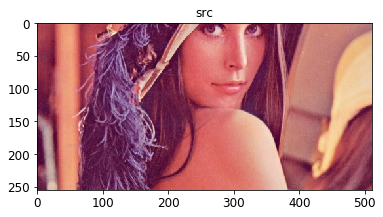

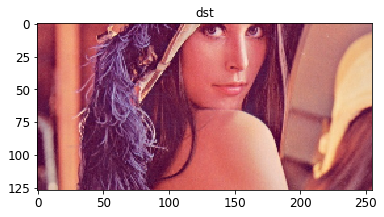

In [36]:
# 图像缩放
# import cv2
# import numpy as np
img = cv2.imread("./image/image0.jpg", 1)
# cv2.imshow("src", img)
imshow_notebook("src", img)
imgInfo = img.shape

height = imgInfo[0]
width = imgInfo[1]

# 缩放矩阵
mat_scale = np.float32([[0.5, 0, 0], [0, 0.5, 0]])

# 缩放图像
dst = cv2.warpAffine(img, mat_scale, ( int(width/2), int(height/2) ))
# cv2.imshow("dst", dst)
# cv2.waitKey(0)
imshow_notebook("dst", dst)

利用矩阵运算，可以实现图像的多种变换


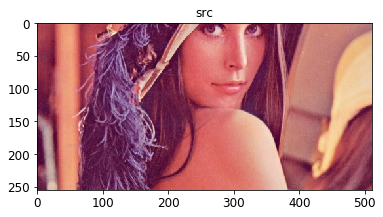

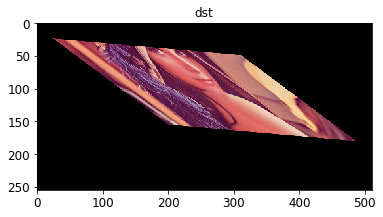

In [39]:
# 图像仿射变换
# import cv2
# import numpy as np
img = cv2.imread("./image/image0.jpg", 1)
# cv2.imshow("src", img)
imshow_notebook("src", img)
imgInfo = img.shape

height = imgInfo[0]
width = imgInfo[1]

# src 3 -> dst 3 (左上角，左下角，右上角)
mat_src = np.float32([[0, 0], [0, height-1], [width-1, 0]])
mat_dst = np.float32([[25, 25], [200, height-100], [width-200, 50]])

# 仿射矩阵 （组合 mat_src mat_dst）
# getAffineTransform 获得一个矩阵组合；参数1，原始图像矩阵三个点位置；参数2 目标图像矩阵三个点位置
mat_affine = cv2.getAffineTransform(mat_src, mat_dst)
dst = cv2.warpAffine(img, mat_affine, (width, height))
# cv2.imshow("dst", dst)
# cv2.waitKey(0)
imshow_notebook("dst", dst)

In [4]:
# 实现在 notebook 中显示图像结果，而不是重新打开一个窗口
def imshow_notebook(name, img):
    import matplotlib.pyplot as plt
    %matplotlib inline
    # To plot pretty figures
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    
    # OpenCV 颜色通道顺序 BGR
    # Matplotlib 颜色通道顺序 RGB
    #img = img[:, :, (2, 1, 0)] # 等价下一行代码
    img = img[:, :, ::-1]
    plt.imshow(img)
    plt.title(name)
    plt.show()


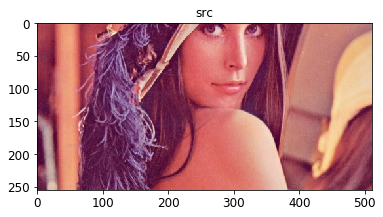

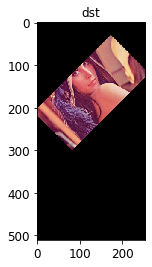

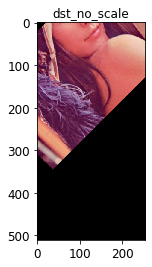

In [9]:
#  图像旋转
import cv2
import numpy as np
img = cv2.imread("./image/image0.jpg", 1)
# cv2.imshow("src", img)
imshow_notebook("src", img)
imgInfo = img.shape

height = imgInfo[0]
width = imgInfo[1]

# 旋转矩阵
# getRotationMatrix2D 旋转矩阵；参数1 旋转中心；参数2 旋转角度；参数3 缩放系数
mat_rotate = cv2.getRotationMatrix2D((height*0.5, width*0.5), 45, 0.5)
mat_rotate_no_scale = cv2.getRotationMatrix2D((height*0.5, width*0.5), 45, 1)


# 仿射变换
dst = cv2.warpAffine(img, mat_rotate, (height, width))
dst_no_scale = cv2.warpAffine(img, mat_rotate_no_scale, (height, width))

# cv2.imshow("dst", dst)
# cv2.imshow("dst_no_scale", dst_no_scale)
# cv2.waitkey(0)
imshow_notebook("dst", dst)
imshow_notebook("dst_no_scale", dst_no_scale)

# 图像特效
- 灰度处理
- 底板效果
- 马赛克
- 毛玻璃效果
- 图像融合
- 图片蓝色（颜色映射）
- 边缘检测（图像细节信息）
- 浮雕效果
- 油画效果
- 形状绘制（图像 and 图形）


(255, 511)
(255, 511, 3)


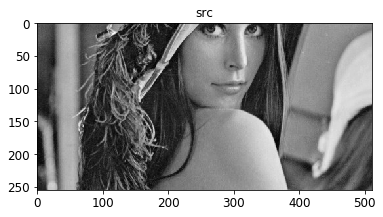

In [3]:
# 实现在 notebook 中显示灰度图像，而不是重新打开一个窗口
def imshow_gray_notebook(name, img):
    import matplotlib.pyplot as plt
    %matplotlib inline
    # To plot pretty figures
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    
    # OpenCV 颜色通道顺序 BGR
    # Matplotlib 颜色通道顺序 RGB
    img = img[:, :]
    plt.imshow(img, cmap="gray")
    plt.title(name)
    plt.show()



# 图像灰度处理
# OpenCV PAI
# solution 1 : imread method
import cv2
img0 = cv2.imread("./image/image0.jpg", 0)
img1 = cv2.imread("./image/image0.jpg", 1)
print(img0.shape)
print(img1.shape)
# cv2.imshow("src", img0)
# cv2.waitKey(0)
imshow_gray_notebook("src", img0)

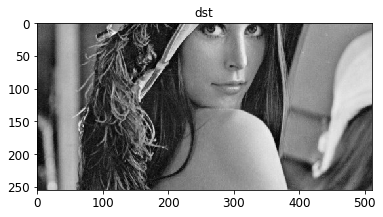

In [12]:
# 图像灰度处理
# OpenCV PAI
# solution 2 : cvtColor method
import cv2
img = cv2.imread("./image/image0.jpg", 1)

#  cvtColor 颜色空间的转换；参数1 图像数据；参数2 BGR 转换 GRAY
dst = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow("dst", dst)
# cv2.waitKey(0)
imshow_gray_notebook("dst", dst)

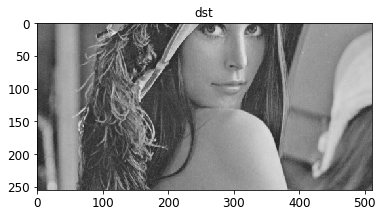

In [14]:
# 图像灰度处理
# solution 3 : R=G=B = GRAY (R+G+B)/3 method

import cv2
import numpy as np

img = cv2.imread("./image/image0.jpg", 1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

# RGB R=G=B = GRAY (R+G+B)/3
dst = np.zeros((height, width, 3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        (b, g, r) = img[i, j]
        # uint8 计算可能溢出
        gray = (int(b) + int(g) + int(r)) / 3
        dst[i, j] = np.uint8(gray)
        
# cv2.imshow("dst", dst)
# cv2.waitKey(0)
imshow_gray_notebook("dst", dst)

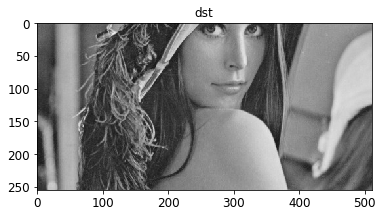

In [16]:
# 图像灰度处理
# 心理学公式
# solution 4 : gray = r*0,299 + g*0.587 + b*0.114 method

import cv2
import numpy as np

img = cv2.imread("./image/image0.jpg", 1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

# gray = r*0.299 + g*0.587 + b*0.114 method
dst = np.zeros((height, width, 3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        (b, g, r) = img[i, j]
        # uint8 计算可能溢出
        b = int(b)
        g = int(g)
        r = int(r)
        gray = r*0.299 + g*0.587 + b*0.114
        dst[i, j] = np.uint8(gray)
        
# cv2.imshow("dst", dst)
# cv2.waitKey(0)
imshow_gray_notebook("dst", dst)

### 算法优化 —— 灰度算法优化（实时性需求）
### 人脸识别，边缘检测，行人识别 ，其基础都是灰度
### 优化操作（计算机硬件知识以及计算机架构知识）
- 定点运算比浮点运算快
- 加减运算比乘除运算快
- 移位操作比乘除运算快

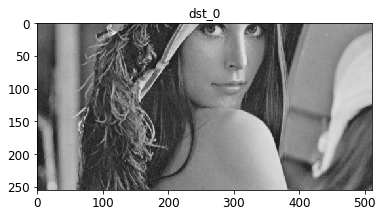

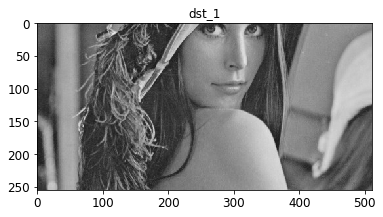

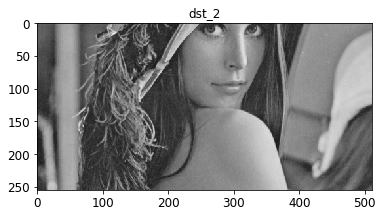

In [27]:
# 图像灰度处理优化
# 心理学公式  gray = r*0,299 + g*0.587 + b*0.114 method
# 优化点 1：gray = (r*1 + g*2 + b*1)/4
# 优化点 2：gray = (r + g<<1 + b)>>2

import cv2
import numpy as np

img = cv2.imread("./image/image0.jpg", 1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

# gray = r*0.299 + g*0.587 + b*0.114 method
dst_0 = np.zeros((height, width, 3), np.uint8)
dst_1 = np.zeros((height, width, 3), np.uint8)
dst_2 = np.zeros((height, width, 3), np.uint8)

for i in range(0, height):
    for j in range(0, width):
        (b, g, r) = img[i, j]
        # uint8 计算可能溢出
        b = int(b)
        g = int(g)
        r = int(r)        
        gray_0 = r*0.299 + g*0.587 + b*0.114
        gray_1 = (r*1 + g*2 + b*1)/4
        gray_2 = (r + (g<<1) + b)>>2
        dst_0[i, j] = np.uint8(gray_0)
        dst_1[i, j] = np.uint8(gray_1)
        dst_2[i, j] = np.uint8(gray_2)

# cv2.imshow("dst", dst)
# cv2.waitKey(0)
imshow_gray_notebook("dst_0", dst_0)
imshow_gray_notebook("dst_1", dst_1)
imshow_gray_notebook("dst_2", dst_2)

In [29]:
print("=========================================================================")
%timeit gray_0 = r*0.299 + g*0.587 + b*0.114
print("=========================================================================")
%timeit gray_1 = (r*1 + g*2 + b*1)/4
print("=========================================================================")
%timeit gray_2 = (r + (g<<1) + b)>>2
print("=========================================================================")

558 ns ± 7.32 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
541 ns ± 18.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
557 ns ± 16.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [36]:
# 图像颜色反转(底板效果)——灰度底板/彩色底板
import cv2
import numpy as np

img = cv2.imread("./image/image0.jpg", 1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

# 灰度转换
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 创建画布矩阵，一个颜色通道 1
dst_gray = np.zeros((height, width, 1), np.uint8)
dst_color = np.zeros((height, width, 3), np.uint8)

for i in range(0, height):
    for j in range(0, width):
        # 灰度底板计算 255 - 当前值
        gray_pixel = gray[i, j]        
        dst_gray[i, j] = 255 - gray_pixel
        # 灰度底板计算 255 - 当前值(计算 bgr 三个分量分别计算)
        (b, g, r) = img[i, j]
        dst_color[i, j] = (255-b, 255-g, 255-r)

cv2.imshow("dst_gray", dst_gray)
cv2.imshow("dst_color", dst_color)
cv2.waitKey(0)


-1

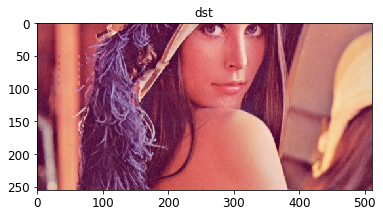

In [45]:
# 马赛克效果
import cv2
import numpy as np

img = cv2.imread("./image/image0.jpg", 1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]


for m in range(50, 100):
    for n in range(10, 100):
        # 选择马赛克矩阵形状
        if m%10 == 0 and n%10 == 0:
            for i in range(0, 5):
                for j in range(0, 5):
                    (b, g, r) = img[m, n]
                    img[i+m, j+n] = (b, g, r)
                    
# cv2.imshow("dst", img)
# cv2.waitKey(0)
imshow_notebook("dst", img)

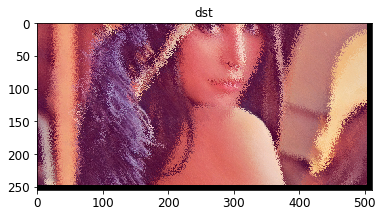

In [48]:
# 毛玻璃效果（马赛克效果的随机替换像素）
import cv2
import numpy as np
import random

img = cv2.imread("./image/image0.jpg", 1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

dst = np.zeros((height, width, 3), np.uint8)
mm = 8
# 随机选择像素进行替换
for m in range(0, height-mm):
    for n in range(0, width-mm):
        index = int(random.random()*8)
        (b, g, r) = img[m+index, n+index]
        dst[m, n] = (b, g, r)
        
# cv2.imshow("dst", dst)
# cv2.waitKey(0)
imshow_notebook("dst", dst)

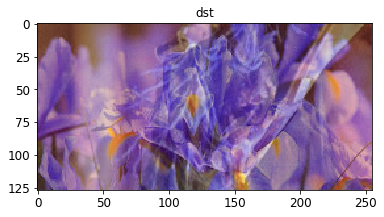

In [51]:
# 图像融合
# dst = src1 * alpha + src2 * (1-alpha)
import cv2
import numpy as np

img_0 = cv2.imread("./image/image0.jpg", 1)
img_1 = cv2.imread("./image/image2.jpg", 1)

imgInfo = img_0.shape
height = imgInfo[0]
width = imgInfo[1]

# ROI 获取感兴趣的范围
roi_height = int(height/2)
roi_width = int(width/2)
img_0_ROI = img_0[0:roi_height, 0:roi_width]
img_1_ROI = img_1[0:roi_height, 0:roi_width]

# dst 融合目标图像
dst = np.zeros([roi_height, roi_width, 3], np.uint8)

# 图像融合（权重）
dst = cv2.addWeighted(img_0_ROI, 0.5, img_1_ROI, 0.5, 0)

# cv2.imshow("dst", dst)
# cv2.waitKey(0)
imshow_notebook("dst", dst)

### 边缘检测
- 实质就是图像卷积运算
- canny 算子
- gray 转换灰度进行处理
- 高斯滤波处理
- canny 算子实现


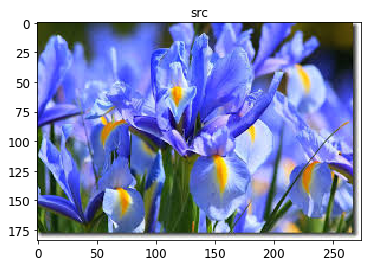

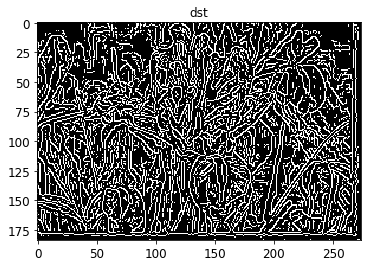

In [54]:
import cv2
import numpy as np
import random

img = cv2.imread("./image/image2.jpg", 1)

imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
# cv2.imshow("src", img)
imshow_notebook("src", img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_Gaussian_filtering = cv2.GaussianBlur(gray, (3, 3), 0)
# Canny 算子；参数1 图像数据；参数2 卷积门限
dst = cv2.Canny(img, 50, 50)

# cv2.imshow("dst", dst)
# cv2.waitKey(0)
imshow_gray_notebook("dst", dst)

In [2]:
import cv2
import numpy as np
import random
import math

img = cv2.imread("./image/images.jpg", 1)

imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
cv2.imshow("src", img)
# imshow_notebook("src", img)

# sobel 算子原理
# sobel 算子源码实现
# 算子模板、图像卷积、阈值判决
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = np.zeros( (height, width, 1), np.uint8)
for i in range(0, height-2):
    for j in range(0, width-2):
        # 计算梯度
        gradient_y = gray[i, j]*1 + gray[i, j+1]*2 + gray[i, j+2]*1 - gray[i+2, j]*1 - gray[i+2, j+1]*2 - gray[i+2, j+2]*1
        gradient_x = gray[i, j]*1 + gray[i+1, j]*2 + gray[i+2, ]*1 - gray[i, j+2]*1 - gray[i+1, j+2]*2 - gray[i+2, j+2]*1
        grad = np.sqrt(gradient_x**2 + gradient_y**2)
        # print(grad)
        # 阈值判决
        if grad[j]>1:
            dst[i, j] = 255
        else:
            dst[i, j] = 0

cv2.imshow("dst", dst)
cv2.waitKey(0)


-1

In [8]:
# 浮雕效果
import cv2
import numpy as np

img = cv2.imread("./image/images.jpg", 1)

imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# newP = gray0 -gray1 + 150
dst = np.zeros( (height, width, 1), np.uint8)
for i in range(0, height):
    for j in range(0, width-1):
        gray_P0 = int(gray[i, j])
        gray_P1 = int(gray[i, j+1])
        new_P = gray_P0 - gray_P1 + 150
        if new_P > 255:
            new_P = 255
        if new_P < 0:
            new_P = 0
        dst[i, j] = new_P
        
cv2.imshow("dst", dst)
cv2.waitKey(0)


-1

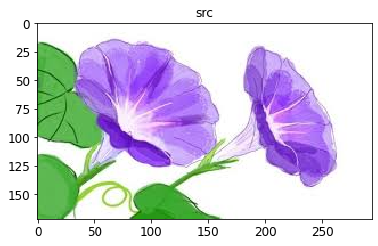

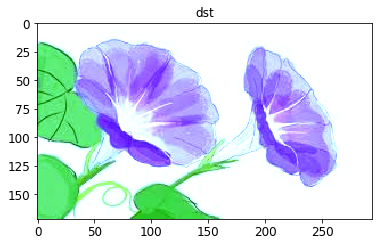

In [11]:
# 颜色映射（颜色风格）
import cv2
import numpy as np

img = cv2.imread("./image/images.jpg", 1)
imshow_notebook("src", img)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

# rgb -> RGB new "bule"
# b = b * 1.5 增强
# g = g * 1.3
dst = np.zeros( (height, width, 3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
        (b, g, r) = img[i, j]
        b *= 1.5
        g *= 1.3
        if b > 255:
            b = 255
        if g > 255:
            g = 255
        dst[i, j] = (b, g, r)

# cv2.imshow("dst", dst)
# cv2.waitKey(0)
imshow_notebook("dst", dst)


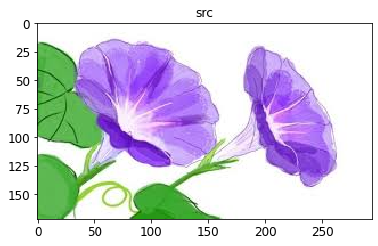

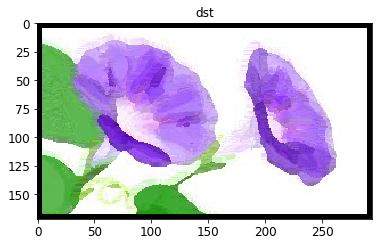

In [13]:
# 油画特效
# 1 color -> gray 2 灰度段  3 统计灰度段
import cv2
import numpy as np

img = cv2.imread("./image/images.jpg", 1)
imshow_notebook("src", img)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

# 灰度化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 创建矩阵储存图像信息（像素点）
dst = np.zeros( (height, width, 3), np.uint8)

for i in range(4, height - 4):
    for j in range(4, width - 4):
        array1 = np.zeros(8, np.uint8)
        for m in range(-4, 4):
            for n in range(-4, 4):
                p1 = int(gray[i+m, j+n]/32)
                array1[p1] = array1[p1] + 1
        current_max = array1[0]
        l = 0
        for k in range(0, 8):
            if current_max < array1[k]:
                current_max = array1[k]
                l = k
        # 简化处理，可以使用均值处理
        for m in range(-4, 4):
            for n in range(-4, 4):
                if gray[i+m, j+n] >= (l*32) and gray[i+m, j+n] <= ((l+1)*32):
                    (b, g, r) =  img[i+m, j+n]
        dst[i, j] = (b, g, r)
        
# cv2.imshow("dst", dst)
# cv2.waitKey(0)
imshow_notebook("dst", dst)

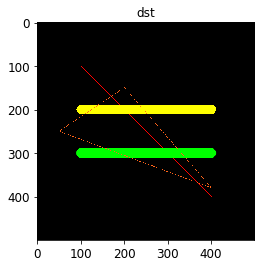

In [19]:
# 图形绘制（线段绘制）
# 形状、文字、图片
import cv2
import numpy as np

new_imgInfo = (500, 500, 3)
dst = np.zeros(new_imgInfo, np.uint8)

# 绘制线段
# line 方法绘制线段；参数1 画布；参数2 起始位置；参数3 终止位置； 参数4 颜色
cv2.line(dst, (100, 100), (400, 400), (0, 0, 255))
# 20 代表线段宽度
cv2.line(dst, (100, 200), (400, 200), (0, 255, 255), 20)
# LINE_AA 代表线条类型
cv2.line(dst, (100, 300), (400, 300), (0, 255, 0), 20, cv2.LINE_AA)

# 绘制三角形
cv2.line(dst, (200, 150), (50, 250), (25, 100, 255))
cv2.line(dst, (50, 250), (400, 380), (25, 100, 255))
cv2.line(dst, (400, 380), (200, 150), (25, 100, 255))

# cv2.imshow("dst", dst)
# cv2.waitKey(0)
imshow_notebook("dst", dst)

(5, 2)
(5, 1, 2)


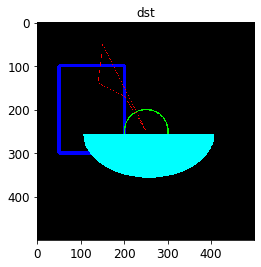

In [30]:
import cv2
import numpy as np

new_imgInfo = (500, 500, 3)
dst = np.zeros(new_imgInfo, np.uint8)

# 绘制矩形
# rectangle 方法；参数1 画布； 参数2 左上角坐标； 参数3 右下角坐标； 参数4 颜色；参数5 是否填充 -1 代表填充
# cv2.rectangle(dst, (50, 100), (200, 300), (255, 0, 0), -1)
cv2.rectangle(dst, (50, 100), (200, 300), (255, 0, 0), 5) # 正值代表线条宽度

# 绘制圆形
# circle 方法；参数1 画布； 参数2 圆心； 参数3 半径；参数4 颜色；参数5 正值代表线条宽度
cv2.circle(dst, (250, 250), (50), (0, 250, 0), 2)

# 绘制椭圆
# ellipse 方法；参数1 画布； 参数2 圆心；参数3 长轴和短轴；参数4 偏转角度；参数5 圆弧起始角度；参数6 圆弧终止角度；参数7 颜色；参数8 是否填充 
cv2.ellipse(dst, (256, 256), (150, 100), 0, 0, 180, (255, 255, 0), -1)

# 绘制任意多边形
points = np.array([[150, 50], [140, 140], [200, 170], [250, 250], [150, 50]], np.int32)
print(points.shape)
# 矩阵维度转换
points = points.reshape((-1, 1, 2))
print(points.shape)
cv2.polylines(dst, [points], True, (0, 0, 255))

# cv2.imshow("dst", dst)
# cv2.waitKey(0)
imshow_notebook("dst", dst)

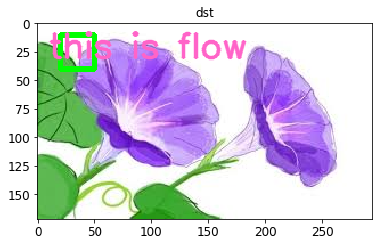

In [35]:
# 文字或者图片绘制
import cv2
import numpy as np

img = cv2.imread("./image/images.jpg", 1)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.rectangle(img, (20, 10), (50, 40), (0, 255, 0), 3)

# 参数1 目标图像；参数2 文字内容；参数3 坐标；参数4 字体类型；参数5 字体大小；参数6 颜色；参数7 文字粗细；参数8 线条类型
cv2.putText(img, "this is flow", (10, 30), font, 1, (200, 100, 255), 2, cv2.LINE_AA)

# cv2.imshow("dst", img)
# cv2.waitKey(0)
imshow_notebook("dst", img)

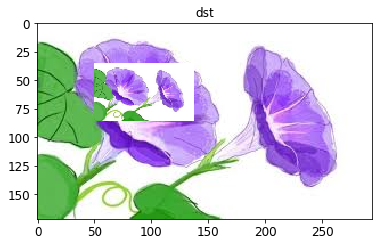

In [37]:
import cv2
import numpy as np

img = cv2.imread("./image/images.jpg", 1)
height = int(img.shape[0]*0.3)
width = int(img.shape[1]*0.3)
img_resize = cv2.resize(img, (width, height))

for i in range(0, height):
    for j in range(0, width):
        img[i+35, j+50] = img_resize[i, j]

# cv2.imshow("dst", img)
# cv2.waitKey(0)
imshow_notebook("dst", img)

### 图像美化
- 直方图
- 直方图均衡化
- 亮度增强
- 磨皮美白
- 图像滤波
- 高斯滤波
